# Monte Carlo simulation of airline overbooking

As companhias aéreas reservam voos para maximizar os lucros.

Considere um voo com assentos para 100 passageiros.

Se a companhia aérea permitir apenas até 100 reservas para o voo, cada cliente receberá um assento no avião. No entanto, várias vagas provavelmente estarão vazias porque uma fração dos clientes que reservam um assento provavelmente perderá o voo. Para cada assento vazio, a companhia aérea perde receita.

Se a companhia aérea permitir mais de 100 reservas, ou seja, se a companhia aérea reservar o voo, é mais provável que clientes suficientes apareçam para encher o avião para que a companhia aérea receba receita de cada assento do avião. No entanto, se mais de 100 clientes que reservaram um voo aparecerem, então (i) os clientes que perderam o voo ficarão irritados e não voarão novamente com essa companhia aérea e (ii) a companhia aérea deverá pagar vouchers para incentivar os voluntários a voar. Isso é caro.

Claramente, existe um delicado equilíbrio de quanto reservar em excesso. Não reserve em excesso: todos os clientes estão satisfeitos, mas os voos operam abaixo da capacidade máxima e perdemos a receita. Excesso de reservas demais: os voos provavelmente estão operando perto da capacidade máxima, por isso, recebemos receita de cada assento, mas os passageiros que saem do voo estão com raiva e os vales caros devem ser pagos aos voluntários.

Como entrada, precisamos da probabilidade de um determinado cliente comparecer ao voo após fazer uma reserva. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def show_up(probability_show):
    """
    A função show_up simula o processo estocástico de um cliente que aparece no voo após fazer uma reserva.
    """
    if np.random.rand() < probability_show:
        return True
    else:
        return False

In [3]:
def simulate_flight(nb_tickets_solf, probability_show):    
    """
    A função simulate_flight simula o processo estocástico de reservas nb_tickets_sold feitas 
    para um voo e retorna o número de clientes que aparecem.
    """
    n = 0
    for i in range(nb_tickets_solf):
        if show_up(probability_show):
            n += 1
    return n

    A receita recebida de um voo dependerá do número de reservas feitas ( nb_tickets_sold ), do número de lugares no avião ( nb_seats ), da probabilidade de um determinado cliente aparecer ( probability_show ), da receita recebida por assento ( revenue_per_seat ) e o custo de um voucher para incentivar os voluntários a pegar um voo diferente quando o avião estiver com overbooking, ( voucher_cost ). O último pode incluir o custo implícito de perder clientes para diferentes companhias aéreas após irritá-los. A função simulate_net_revenue simula o processo estocástico e retorna a receita líquida do voo.

In [4]:
def simulate_net_revenue(nb_tickets_solf, nb_seats, probability_show, revenue_per_seat, voucher_cost):
    # how many ticket purchasers actually showed up?
    nb_shows = simulate_flight(nb_tickets_solf, probability_show)
    
    # no one bumped from flight if less or equal folks show up than for
    # the number of seats we have
    if nb_shows <= nb_seats:
        return revenue_per_seat*nb_shows
    else:
        voucher_out = nb_shows - nb_seats
        return nb_seats*revenue_per_seat - voucher_cost*voucher_out

#### Para um voo de US $ 350 em um avião de 100 lugares, onde os vales são o dobro do custo do bilhete:

In [5]:
# Probabilidade de um determinado cliente comparecer ao voo após fazer uma reserva
probability_show = 0.935
# Numero de lugares no avião
nb_seats = 100 
# Valor da Passagem
revenue_per_seat = 350.0 # USD
# Valor do vale para incentivar os voluntários embarcar em outro voo.
voucher_cost = revenue_per_seat * 2.0 # USD

    Agora simulamos o processo de diferentes quantidades de overbooking para identificar a quantidade ideal de overbooking. Como este é um processo estocástico, executamos 10.000 simulações para simular 10.000 voos, para que possamos calcular a receita líquida média para cada quantidade de overbooking e medir a variação entre os voos.

In [6]:
nb_flights = 10000
max_overbooking = 15

revenue = np.zeros((nb_flights, max_overbooking+1))
for tix_overbooking in range(max_overbooking):
    nb_tickets_sold = nb_seats + tix_overbooking
    for f in range(nb_flights):
        revenue[f, tix_overbooking] = simulate_net_revenue(nb_tickets_sold, nb_seats, probability_show, 
                                                           revenue_per_seat, voucher_cost)

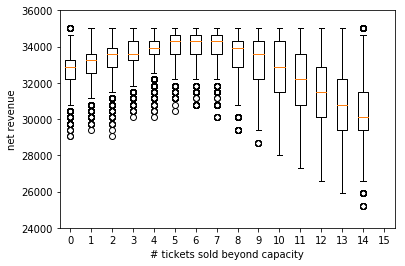

In [7]:
plt.boxplot(revenue, labels=list(range(max_overbooking+1)))
plt.ylim(24000,36000)
plt.xlabel("# tickets sold beyond capacity")
plt.ylabel("net revenue")
plt.show()

    O box mostra que, se não fizermos overbook (0 no eixo da horizontal), recebemos, em média, menos receita líquida do que se fizermos overbooking. Se reservarmos demais, por exemplo, vendermos 15 ingressos acima da capacidade, veremos que a receita líquida média é menor do que se formos em excesso, porque estamos pagando vales caros. A quantidade ideal de overbooking com esses parâmetros é mostrada pela caixa gráfica como 5 a 7 tickets além da capacidade. Naturalmente, esse resultado depende da probabilidade de um cliente aparecer, do custo do vôo e do voucher e do número de assentos no avião.